In [30]:
# Classification Project: Sonar rocks or mines

# Load libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
# Load dataset
url = 'sonar.csv'
dataset = read_csv(url, header=None)

# Summarize Data
**Descriptive statistics**

In [32]:
# shape
print(dataset.shape)

(208, 61)


In [33]:
# types
set_option('display.max_rows', 5)
print(dataset.dtypes)

0     float64
1     float64
       ...   
59    float64
60     object
Length: 61, dtype: object


In [34]:
# head
set_option('display.width', 100)
print(dataset.head(20))

       0      1      2      3      4      5      6      7      8      9   ...     51     52  \
0   0.020  0.037  0.043  0.021  0.095  0.099  0.154  0.160  0.311  0.211  ...  0.003  0.006   
1   0.045  0.052  0.084  0.069  0.118  0.258  0.216  0.348  0.334  0.287  ...  0.008  0.009   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...    ...    ...   
18  0.027  0.009  0.015  0.028  0.041  0.076  0.103  0.114  0.079  0.152  ...  0.008  0.001   
19  0.013  0.015  0.064  0.173  0.257  0.256  0.295  0.411  0.498  0.592  ...  0.009  0.004   

       53     54         55     56     57     58     59  60  
0   0.016  0.007  1.670e-02  0.018  0.008  0.009  0.003   R  
1   0.005  0.009  1.910e-02  0.014  0.005  0.005  0.004   R  
..    ...    ...        ...    ...    ...    ...    ...  ..  
18  0.002  0.007  3.900e-03  0.012  0.013  0.007  0.009   R  
19  0.010  0.012  6.000e-04  0.018  0.009  0.012  0.006   R  

[20 rows x 61 columns]


In [35]:
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())

            0        1        2        3        4        5        6        7        8        9   \
count  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029    0.038    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
...        ...      ...      ...      ...      ...      ...      ...      ...      ...      ...   
75%      0.036    0.048    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137    0.234    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

       ...       50       51       52       53       54       55       56       57       58  \
count  ...  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean   ...    0.016    0.013    0.011    0.011    0.009    0.008    0.008    0.008    0.008   
...    ...      ...      ...      ...      ...      ...      ...      ...      ...      ...   
75%    ...    0.021    0.

In [36]:
# class distribution
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


# Data visualizations

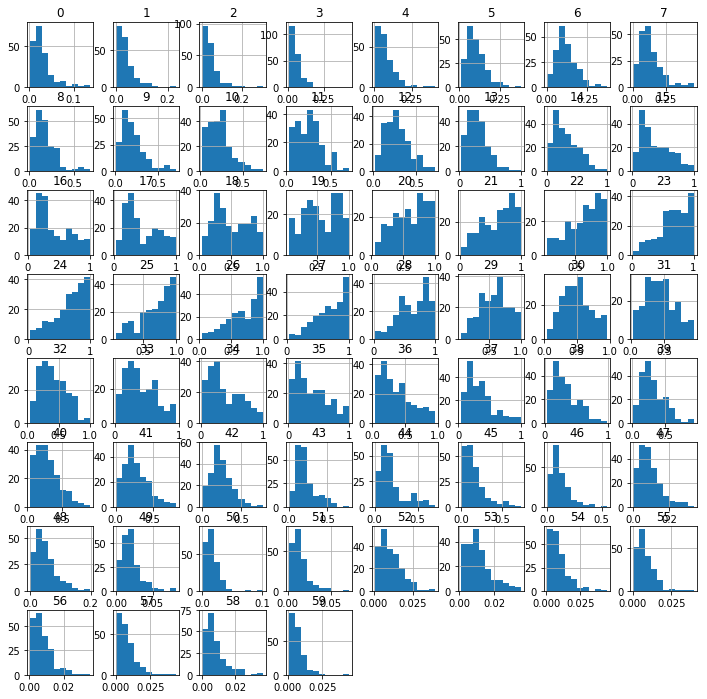

In [37]:
# histograms
dataset.hist(figsize = (12,12))
pyplot.show()

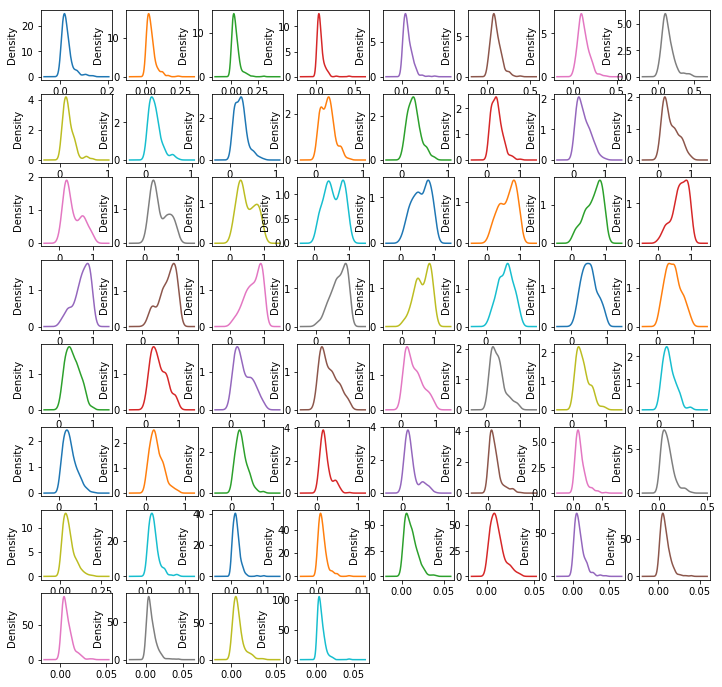

In [38]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, figsize = (12,12))
pyplot.show()

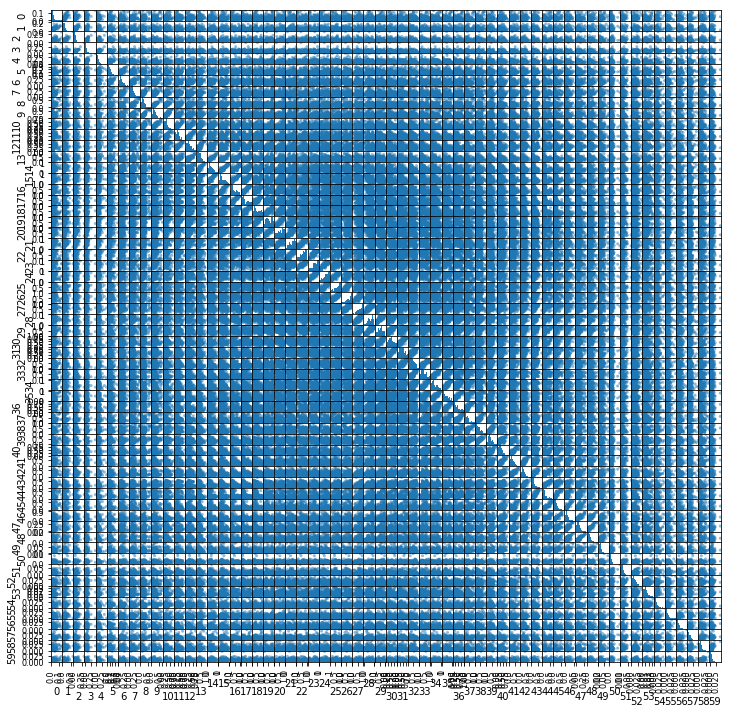

In [27]:
# scatter plot matrix
scatter_matrix(dataset, figsize = (12,12))
pyplot.show()



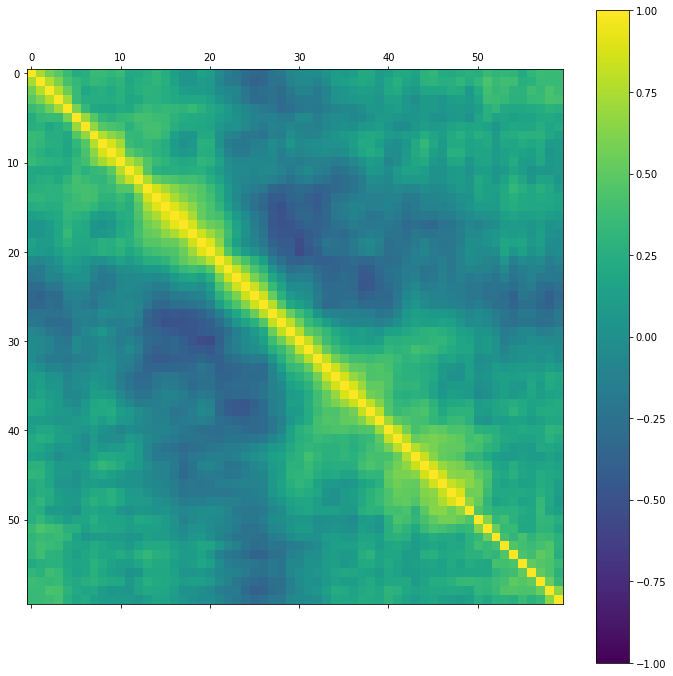

In [29]:
# correlation matrix
fig = pyplot.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

# Prepare Data

In [39]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Evaluate Algorithms

In [ ]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure(figsize = (12,12))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure(figsize = (12,12))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure(figsize = (12,12))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))